In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline  

In [30]:
data = pd.read_csv('./gifts-data.tsv', delimiter='\t')

#dropping invalid rows (every second BTW)
data = data.drop([i for i in range (1, len(data), 2)], axis=0)

#droppint working columns
to_drop = ['INPUT:theme', 'ASSIGNMENT:link', 'ASSIGNMENT:assignment_id', 'ASSIGNMENT:worker_id',
           'ASSIGNMENT:status', 'ASSIGNMENT:started', 'ACCEPT:verdict', 'ACCEPT:comment']
data = data.drop(to_drop, axis=1)

#dropping fully nan columns
for col in data.columns:
    nan_ = sum(data[col].isnull())
    if nan_ == len(data):
        data = data.drop([col], axis=1)

#checking out what's left
for key, value in data.iloc[0].iteritems():
    print (key, value)

OUTPUT:self_age 53.0
OUTPUT:self_time 2.0
OUTPUT:person_age 56.0
OUTPUT:person_tel 2.0
OUTPUT:person_auto 0.0
OUTPUT:person_hair 0.0
OUTPUT:person_time 7.0
OUTPUT:person_work 2.0
OUTPUT:self_gender 1.0
OUTPUT:person_hobby 0.0
OUTPUT:person_music 4.0
OUTPUT:person_sport 0.0
OUTPUT:person_gender 1.0
OUTPUT:person_height 3.0
OUTPUT:person_mental 0.0
OUTPUT:person_social 2.0
OUTPUT:self_variants 1.0
OUTPUT:person_animals 1.0
OUTPUT:self_gift_link nan
OUTPUT:self_gift_mark 0.0
OUTPUT:self_gift_name Аккустическая система с фм
OUTPUT:person_psycho_1 1.0
OUTPUT:person_psycho_2 0.0
OUTPUT:person_psycho_3 0.0
OUTPUT:person_psycho_4 0.0
OUTPUT:person_psycho_5 0.0
OUTPUT:person_psycho_6 0.0
OUTPUT:person_psycho_7 0.0
OUTPUT:person_psycho_8 1.0
OUTPUT:person_psycho_9 1.0
OUTPUT:self_gift_times 6.0
OUTPUT:self_gift_usage 0.0
OUTPUT:person_closeness 4.0
OUTPUT:person_education 1.0
OUTPUT:self_gift_desc_1 0.0
OUTPUT:self_gift_desc_2 0.0
OUTPUT:self_gift_desc_3 1.0
OUTPUT:self_gift_desc_4 1.0
OUTPUT:se

In [31]:
data[text_like].to_csv('text_features.csv',sep='\t')

In [32]:
# dropping text features (but not gift description)
text_like = ['OUTPUT:person_character_word', 'OUTPUT:person_appearance_word', 'OUTPUT:person_description_text',
            'OUTPUT:person_communication_word', 'OUTPUT:person_individuality_word', 'OUTPUT:self_gift_link',]

# ******

tdata = data[text_like]
tdata = tdata.drop('OUTPUT:self_gift_link', axis=1)

# ******

data = data.drop(text_like, axis=1) #at the start we do not really need it

#gift description drop
data = data.drop(['OUTPUT:self_gift_name'], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

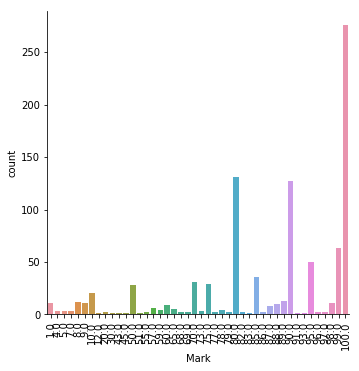

In [9]:
sns.catplot(x='Mark', kind='count', data=pd.DataFrame(data['OUTPUT:self_gift_mark_2'].values, columns=['Mark']), )
plt.xticks(rotation=90)


тут рассказать про три пика и про то что оценка от 1 до 100 для того чтобы получить три пика 80 90 100, 
которые соответствуют оценкам 3 4 и 5 в пятибальной шкале и мы бы с гарантией их не получили, если бы поставили пятибальную систему

In [10]:
#
# тут бы пошабить распределение до более адекватного
# чтобы показать улучшающуюся чиселку и восклицание "нихуя мы шарим"

# Encoding

In [11]:
# useless at first view
additional_drops = ['OUTPUT:self_gift_mark', 'OUTPUT:self_variants', 'OUTPUT:self_gift_times', 'OUTPUT:self_gift_usage',
                    'OUTPUT:self_gift_bad_usage']
data = data.drop(additional_drops, axis=1)


for key, value in data.iloc[0].iteritems():
    print (key, value)

OUTPUT:self_age 53.0
OUTPUT:self_time 2.0
OUTPUT:person_age 56.0
OUTPUT:person_tel 2.0
OUTPUT:person_auto 0.0
OUTPUT:person_hair 0.0
OUTPUT:person_time 7.0
OUTPUT:person_work 2.0
OUTPUT:self_gender 1.0
OUTPUT:person_hobby 0.0
OUTPUT:person_music 4.0
OUTPUT:person_sport 0.0
OUTPUT:person_gender 1.0
OUTPUT:person_height 3.0
OUTPUT:person_mental 0.0
OUTPUT:person_social 2.0
OUTPUT:person_animals 1.0
OUTPUT:person_psycho_1 1.0
OUTPUT:person_psycho_2 0.0
OUTPUT:person_psycho_3 0.0
OUTPUT:person_psycho_4 0.0
OUTPUT:person_psycho_5 0.0
OUTPUT:person_psycho_6 0.0
OUTPUT:person_psycho_7 0.0
OUTPUT:person_psycho_8 1.0
OUTPUT:person_psycho_9 1.0
OUTPUT:person_closeness 4.0
OUTPUT:person_education 1.0
OUTPUT:self_gift_desc_1 0.0
OUTPUT:self_gift_desc_2 0.0
OUTPUT:self_gift_desc_3 1.0
OUTPUT:self_gift_desc_4 1.0
OUTPUT:self_gift_desc_5 0.0
OUTPUT:self_gift_desc_6 2.0
OUTPUT:self_gift_desc_7 1.0
OUTPUT:self_gift_desc_8 2.0
OUTPUT:self_gift_desc_9 1.0
OUTPUT:self_gift_mark_2 100.0
OUTPUT:person_chron

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer

Y = data['OUTPUT:self_gift_mark_2']
X = data.drop('OUTPUT:self_gift_mark_2', axis=1) 

leave = ['OUTPUT:person_age', 'OUTPUT:self_age']
to_onehot = X.drop(['OUTPUT:person_age', 'OUTPUT:self_age'], axis=1).columns.values

onehotencoded = pd.get_dummies(X[to_onehot].astype(str))

to_binarize = []

def binarize_column(data , column):
    un = data[column].unique()
    un_dict = {v:k for k, v in enumerate(un)}
    data[column] = data[column].apply(lambda x: un_dict[x])
   
def binarize_set(data):
    for col in data.columns:
        binarize_column(data, col)
    
binarized = data[to_binarize].copy()
binarize_set(binarized)

In [13]:
len(to_onehot) + len(leave) == len(X.columns)

True

In [14]:
X_encoded = pd.concat([onehotencoded, X[leave]], axis=1)

# Missing values

In [15]:
for col in X_encoded.columns:
    nan_ = sum(X_encoded[col].isnull())
    if nan_ > 0:
        print (col, nan_/float(len(X_encoded)))

No missing values. Pretty situation.

First approach. Just encoded values and random forest.

In [16]:
from sklearn.model_selection import GridSearchCV

def score_params(*data, param_grid):
    X, Y = data
    rfr=RandomForestRegressor(random_state=42)

    

    CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 10)
    CV_rfc.fit(X, Y)

    print (CV_rfc.best_params_)
    rfr=RandomForestRegressor(random_state=42)
    rfr.set_params(**CV_rfc.best_params_)
    mean, std = perform_n_cv(rfr, X, Y, cv_count=10, scoring=make_scorer(mean_squared_error), iterations=10)
    print (mean, '+-' ,std)
    
def perform_n_cv(clf, x, y, cv_count, scoring, iterations):
    cv_accumulator = []
    for i in range(iterations):
        cv = cross_val_score(clf, x, y, cv=cv_count, scoring=scoring)
        cv_accumulator.append([np.mean(np.sqrt(cv)), np.std(np.sqrt(cv))])
        
    return np.mean(np.array(cv_accumulator)[:, 0]), np.mean(np.array(cv_accumulator)[:, 1])

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

score_params(X_encoded, Y,
             param_grid = {'n_estimators': [15, 20, 25, 30, 40],
                           'max_depth' : [1, 2, 3, 4, 5, None]})

{'n_estimators': 20, 'max_depth': 2}
23.94992836983369 +- 3.5656563509999786


In [18]:
# на незакодированных 23.846835097847883 +- 3.473360060146124, {'max_depth': 2, 'n_estimators': 25}
# на закодированных хуже, живите с этим

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

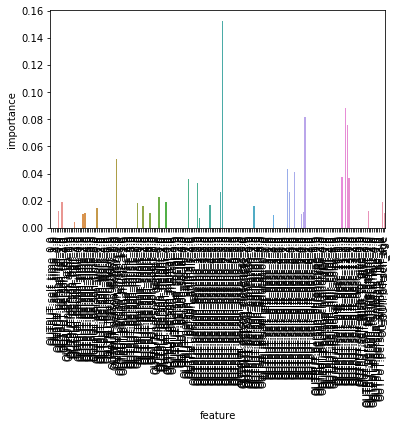

In [19]:
# feature importance JFY
clf = RandomForestRegressor(random_state=42, max_depth=2, n_estimators=25)
clf.fit(X_encoded, Y)
g= sns.barplot(x='feature', y='importance', data=pd.DataFrame(list(zip(clf.feature_importances_, X_encoded.columns)), columns=['importance', 'feature']))
plt.xticks(rotation=90)

### distribution naive changes

In [20]:
y_frame = pd.DataFrame(Y.values, columns=['target']).set_index(keys=X_encoded.index)
y_frame[y_frame.target <= 10] = y_frame[y_frame.target <= 10]*10
X_encoded = X_encoded.drop(y_frame[y_frame.target < 50].index)
y_frame = y_frame.drop(y_frame[y_frame.target < 50].index)

In [21]:
score_params(X_encoded, y_frame.target,
             param_grid = {'n_estimators': [35, 40, 45, 50],
                           'max_depth' : [2,3, 4, None]})

/home/dmitriy/MyEnv/other/skoltech/intro-to-ds/env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 50, 'max_depth': 3}
12.32585379016012 +- 1.723331833073496


easy easy, check this out boys

### some tests

In [22]:
m = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=3)
m.fit(X_encoded,y_frame)

/home/dmitriy/MyEnv/other/skoltech/intro-to-ds/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

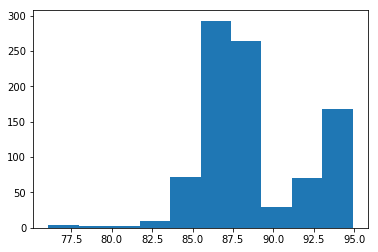

In [24]:

plt.hist(m.predict(X_encoded))
plt.show()

In [33]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import operator
import pymorphy2
import gensim

In [34]:
res = []
for idx, row in tdata.iterrows():
    s = ""
    for col in tdata.columns:
        s += row[col].lower() + ' '
    s = s.replace(',', '')
    s = s.replace('  ', '')
    res.append(s)
res   

['уравновешенный приятная чистоплотный организованный ответственный пунктуальный всегда доводит начатое дело до конца любящий природу приятное порядочный ',
 'весельчак. приятный. неусидчивый очень легко отвлекается и увлекается. всегда можно направить его в нужное русло. совсем не держит слово но очень верит в то что может. никогда не обижается. цепкий как репей. ненавязчивое. наивный стяжатель. ',
 'реалист миловидная ум скромность честность привлекательность обаяние напористость строгость справедливость отзывчивость пунктуальность доброта. приятное ответственность ',
 'веселая красивая немного наивная верит в любовь с первого взгляда любит дурачиться плакса иногда очень взрослая ведет себя серьезно иногда как дите малое любит цветы и яркие краски образы неуклюжая умеет готовить но не любит легко уникальность ',
 'спокойный красавчик лучшая\tлегкая\tмилая\tмечтательная манящая миниатюрная нежная неповторимая незабываемая неотразимая невообразимая непредсказуемая непосредственная нена

In [56]:
def return_thematic_features(model, doc_set):
    tokenizer = RegexpTokenizer(r'\w+')

    ru_stop = stopwords.words('russian')

    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    
    morph = pymorphy2.MorphAnalyzer()
    # list for tokenized documents in loop
    texts = []
    token_counts = {}
    sum_counts = 0
    docs_tokens = []
    # loop through document list
    for idx in range(len(doc_set)):
        # clean and tokenize document string
        raw = doc_set[idx].lower()
        tokens = tokenizer.tokenize(raw)
        # уборка частых слов уже после токенизации осознанна
        for elem in tokens:
            if elem in token_counts:
                token_counts[elem] += 1
            else:
                token_counts[elem] = 1
            sum_counts += 1
        docs_tokens.append(tokens)

    sorted_counts = sorted(token_counts.items(), key=operator.itemgetter(1))
    #sorted_counts.reverse()

    summator = 0
    sum_counts_fl = float(sum_counts)
    for idx in range(len(sorted_counts)):
        if summator / sum_counts_fl < float(0.4): # отсеиваемая доля
            summator += sorted_counts[idx][1]
            ru_stop.append(sorted_counts[idx][0])
        else:
            break 

    for idx in range(len(doc_set)):
        tokens = docs_tokens[idx]
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in ru_stop]
        # stem tokens
        #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

        # add tokens to list
        texts.append(stopped_tokens)
        
    normalized_texts = []
    for elem in texts:
        new = []
        for w in elem:
            p = morph.parse(w)[0]
            new.append(p.normal_form)
        normalized_texts.append(new)
        
    features = []
    for text in texts:
        answ = dict()
        for i in range(model.num_topics):
            answ['thematic_'+str(i)] = 0.0
        dictionary = model.id2word
        pred = dictionary.doc2bow(text)
        for elem in model[pred]:
            answ['thematic_'+str(elem[0])] = float(elem[1])
        features.append(answ)
    return features

In [58]:
m = gensim.models.LdaModel.load("models/standalone/gensim/morphy/thr0.5/10/results.model")

In [59]:
thematic_features = return_thematic_features(m, res)

In [60]:
tdata_features = pd.DataFrame(thematic_features)

In [61]:
tdata_features.head(5)

,thematic_0,thematic_1,thematic_2,thematic_3,thematic_4,thematic_5,thematic_6,thematic_7,thematic_8,thematic_9
0,0.107554,0.000000,0.464233,0.000000,0.253505,0.000000,0.120155,0.000000,0.000000,0.000000
1,0.014287,0.014288,0.014291,0.871402,0.014288,0.014286,0.014294,0.014286,0.014286,0.014292
2,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.887497,0.012500,0.012501,0.012501
3,0.720953,0.000000,0.000000,0.138126,0.000000,0.000000,0.000000,0.000000,0.087070,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.805148,0.141512,0.000000,0.000000,0.000000
